In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
path = "../data/movielens/"
print(os.listdir(path))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [9]:
ratings_df = pd.read_csv(os.path.join(path +'ratings.csv'), encoding = 'utf-8')
movies_df = pd.read_csv(os.path.join(path +'movies.csv'), encoding = 'utf-8')
tags_df = pd.read_csv(os.path.join(path +'tags.csv'), encoding = 'utf-8')

#### timestamp는 절대적인 시각의 값이다.
100836 의 평점이 있다.

In [7]:
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [10]:
print(movies_df.shape)
print(movies_df.head())

(9742, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [11]:
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


### 평점데이터(ratings)의 기초 통계량

In [19]:
len(list(ratings_df['userId'].values))

100836

In [21]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [22]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [26]:
print('평점의 평균 : {}'.format(ratings_df['rating'].mean()))
print('평점의 표준편차 : {}'.format(ratings_df['rating'].std()))

평점의 평균 : 3.501556983616962
평점의 표준편차 : 1.0425292390605359


In [27]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [28]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [32]:
print(ratings_df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
0


C:\Users\wq_ysw\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'userId'}>],
       [<AxesSubplot:title={'center':'movieId'}>, <AxesSubplot:>]],
      dtype=object)

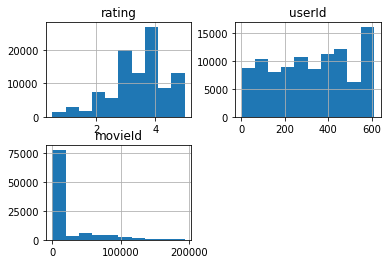

In [33]:
ratings_df[['rating','userId','movieId']].hist()

### Pandas의 Groupby 사용하기

In [34]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [36]:
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [40]:
userid_rating_df = pd.DataFrame({'count':ratings_df.groupby(['userId','rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [43]:
user_info = ratings_df.groupby('userId')['rating'].count()

In [44]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

In [45]:
import seaborn as sns

C:\Users\wq_ysw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

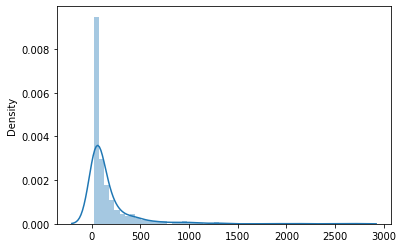

In [46]:
sns.distplot(user_info.values)

In [49]:
stats_df = pd.DataFrame({
    'movie_count' : ratings_df.groupby(['userId'])['movieId'].count(),
    'ratings_avg' : ratings_df.groupby(['userId'])['rating'].mean(),
    'ratings_std' : ratings_df.groupby(['userId'])['rating'].std()
})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  ratings_avg  ratings_std
userId                                       
1               232     4.366379     0.800048
2                29     3.948276     0.805615
3                39     2.435897     2.090642
4               216     3.555556     1.314204
5                44     3.636364     0.990441


### rating이 많은 영화(다시 말해, 사람들의 관심이 많은 영화)

In [54]:
movieid_user_df = pd.DataFrame({
    'num_users_watch' : ratings_df.groupby(['movieId'])['userId'].count(),
    'avg_ratings' : ratings_df.groupby(['movieId'])['rating'].mean(),
    'std_ratings' : ratings_df.groupby(['movieId'])['rating'].std()
})

movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


In [56]:
movieid_user_df = movieid_user_df.sort_values(['num_users_watch'],ascending = False)
movieid_user_df

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
...,...,...,...,...
3053,4093,1,1.500000,NaN
3049,4089,1,2.000000,NaN
6687,58351,1,4.000000,NaN
3045,4083,1,4.000000,NaN


<AxesSubplot:>

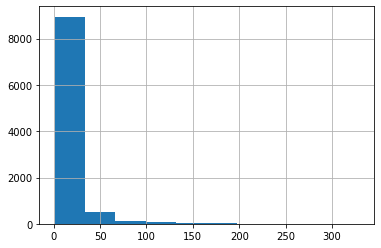

In [59]:
movieid_user_df['num_users_watch'].hist()

In [61]:
movieid_user_df[movieid_user_df['num_users_watch'] == 1]['movieId'].count()

3446

In [62]:
movieid_user_df[movieid_user_df['num_users_watch'] < 3]['movieId'].count()

4744

### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [63]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
# 평점을 많이 받은 영화
ratings_count_df = ratings_df.groupby(['movieId'])['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [68]:
df = pd.DataFrame({
    'ratings_count' : ratings_df.groupby(['movieId'])['userId'].count()
})

In [71]:
# 이거 안된다... 29분
df['movie_name'] = df.apply(lambda x : movies_df.loc[x.index, 'title'])
df.head()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 25746,  25750,  25752,  25753,  25757,\n            ...\n            193581, 193583, 193585, 193587, 193609],\n           dtype='int64', name='movieId', length=4334). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"